<a href="https://colab.research.google.com/github/nik8233/addeclip/blob/main/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files  # Use files for uploading in environments like Google Colab

# Upload the Excel file
uploaded = files.upload()

# Convert the uploaded file to a pandas DataFrame
for file_name in uploaded.keys():
    df = pd.read_excel(file_name)  # Read the Excel file

# Save the DataFrame as a CSV file
df.to_csv('converted_file.csv', index=False, encoding='utf-8')

print("Excel file has been converted to CSV and saved as 'converted_file.csv'")

Saving new nlp dataset.xlsx to new nlp dataset.xlsx
Excel file has been converted to CSV and saved as 'converted_file.csv'


In [ ]:
print(df.columns)

Index(['உணவு மிகவும் சுவையாக இருந்தது, சேவை அருமை!', '1'], dtype='object')


In [ ]:
df.columns = ['Review', 'Sentiment']

In [ ]:
X = df['Review']    # Column for reviews
y = df['Sentiment']  # Column for sentiment

In [ ]:
# Load the Excel file and print the data
df = pd.read_excel(file_name, header=None)  # Load without headers
print("Data in your Excel file:")
print(df)

# Check the current columns
print("Current columns:", df.columns)

# Assign appropriate column names
df.columns = ['Review', 'Sentiment']  # Make sure these match your data

# Confirm the columns have been set correctly
print("Updated columns:", df.columns)

# Use the DataFrame for analysis
X = df['Review']    # Column for reviews
y = df['Sentiment']  # Column for sentiment

Data in your Excel file:
                                                     0  1
0           உணவு மிகவும் சுவையாக இருந்தது, சேவை அருமை!  1
1                  உணவின் தரம் மிகவும் மோசமாக இருந்தது  0
2               இட்லி சூடாகவும் மென்மையாகவும் இருந்தது  1
3          பரோட்டா கச்சா கச்சா இருந்தது, விரும்பவில்லை  0
4          உணவு நேரத்திற்கு வந்தது, குளிர்ந்த நிலையில்  0
..                                                 ... ..
135                     புலாவ் அதிகமாக புளித்திருந்தது  0
136  ஆப்பம் மிகவும் சுவையாகவும் மென்மையாகவும் இருந்தது  1
137                      பாஸ்தா சுவையில்லாமல் இருந்தது  0
138  சோயா சிக்கன் நன்றாக சமைக்கப்பட்டு சுவையாக இருந...  1
139             சிக்கன் மசாலா மிகவும் சுவையாக இருந்தது  1

[140 rows x 2 columns]
Current columns: Index([0, 1], dtype='int64')
Updated columns: Index(['Review', 'Sentiment'], dtype='object')


Data in your CSV file:
            உணவு மிகவும் சுவையாக இருந்தது, சேவை அருமை!  1
0                  உணவின் தரம் மிகவும் மோசமாக இருந்தது  0
1               இட்லி சூடாகவும் மென்மையாகவும் இருந்தது  1
2          பரோட்டா கச்சா கச்சா இருந்தது, விரும்பவில்லை  0
3          உணவு நேரத்திற்கு வந்தது, குளிர்ந்த நிலையில்  0
4          ஆப்பம் அருமையாக இருந்தது, சாம்பார் சூப்பர்!  1
..                                                 ... ..
134                     புலாவ் அதிகமாக புளித்திருந்தது  0
135  ஆப்பம் மிகவும் சுவையாகவும் மென்மையாகவும் இருந்தது  1
136                      பாஸ்தா சுவையில்லாமல் இருந்தது  0
137  சோயா சிக்கன் நன்றாக சமைக்கப்பட்டு சுவையாக இருந...  1
138             சிக்கன் மசாலா மிகவும் சுவையாக இருந்தது  1

[139 rows x 2 columns]
Columns in the DataFrame: Index(['உணவு மிகவும் சுவையாக இருந்தது, சேவை அருமை!', '1'], dtype='object')
Data in your CSV file:
                                                     0  1
0           உணவு மிகவும் சுவையாக இருந்தது, சேவை அருமை!  1
1                

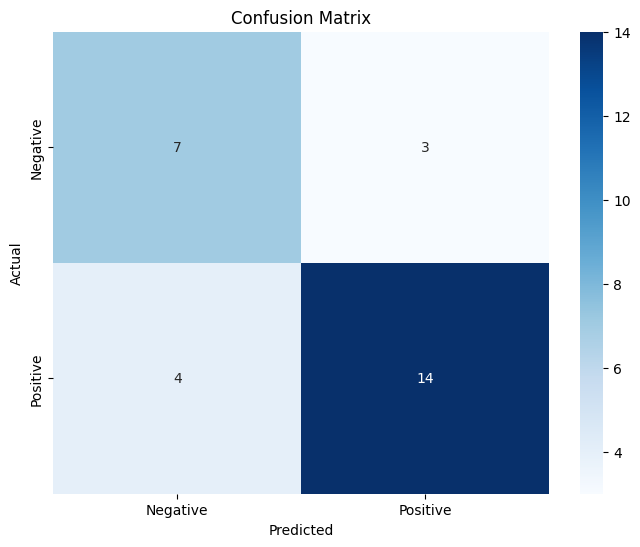

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Print the DataFrame to inspect the data
print("Data in your CSV file:")
print(df)

# Print the columns to see their names
print("Columns in the DataFrame:", df.columns)
# If the first row is not headers, you can set header=None in read_csv
df = pd.read_csv(file_name, header=None)

# Assign appropriate column names
df.columns = ['Review', 'Sentiment']  # Make sure these names match your data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the CSV file name (ensure it is in the same directory)
file_name = 'converted_file.csv'  # Change this to your actual file name if different

# Load the CSV file into a DataFrame, without headers if needed
df = pd.read_csv(file_name, header=None)

# Print the DataFrame to inspect the data
print("Data in your CSV file:")
print(df)

# Print the columns to see their names
print("Columns in the DataFrame:", df.columns)

# Assign appropriate column names
df.columns = ['Review', 'Sentiment']  # Adjust this if the names differ

# Prepare data
X = df['Review']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data to a bag-of-words (BoW) representation
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_bow, y_train)

# Predict on the test data
y_pred = model.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


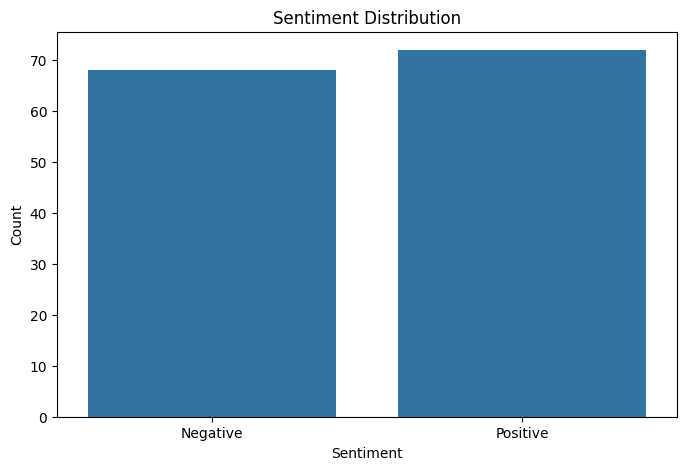

In [ ]:
# Count the number of positive and negative sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


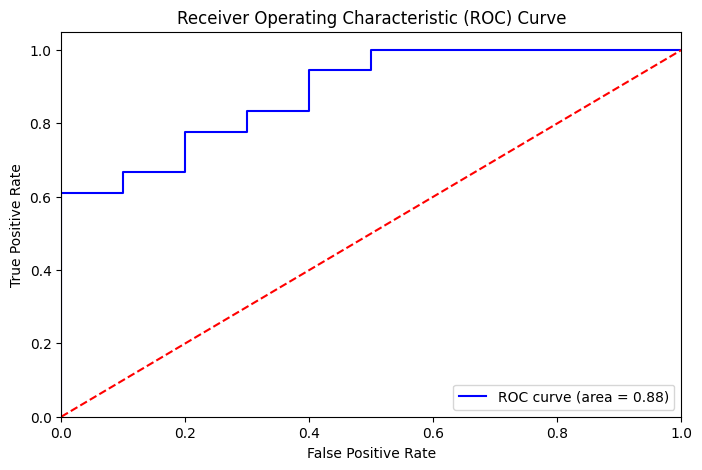

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities of the positive class
y_prob = model.predict_proba(X_test_bow)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pip install pandas


In [ ]:
import pandas as pd

# Specify the CSV file name
file_name = 'nlp_tamil_new_dataset.csv'

# Read the CSV file
try:
    df = pd.read_csv(file_name, header=None)  # Adjust header if necessary
    df.columns = ['Review', 'Sentiment']  # Set appropriate column names
    print("Data in your CSV file:")
    print(df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"File not found: {file_name}")
except Exception as e:
    print(f"An error occurred: {e}")




Data in your CSV file:
                                              Review  Sentiment
0  இட்லி மிக மென்மையாகவும் சூடாகவும் இருந்தது, சு...          1
1  "சாப்பாடு மிகவும் ருசியாக இருந்தது, மற்றும் சே...          1
2  "சாம்பார் சூப்பர்! உணவகத்தின் மொத்த அனுபவமும் ...          1
3  "வாடிக்கையாளருக்கு மிகுந்த மரியாதையுடன் பார்த்...          1
4  "உணவின் தரம் மிகவும் சிறப்பாக இருந்தது, மீண்டு...          1


In [ ]:
pip install pandas scikit-learn seaborn matplotlib


Accuracy: 80.00%


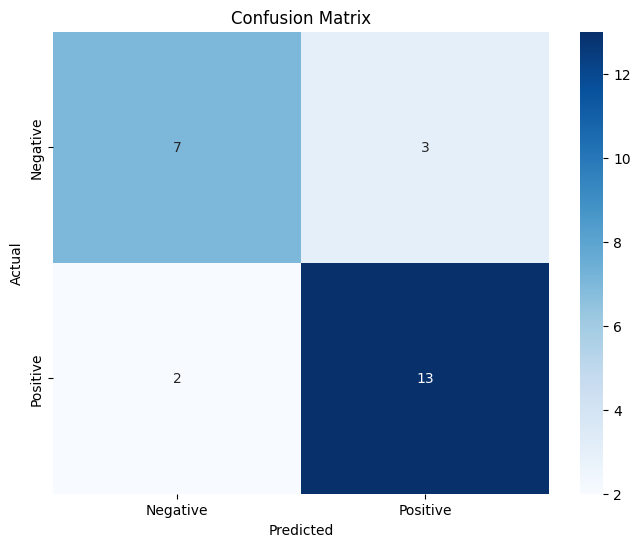

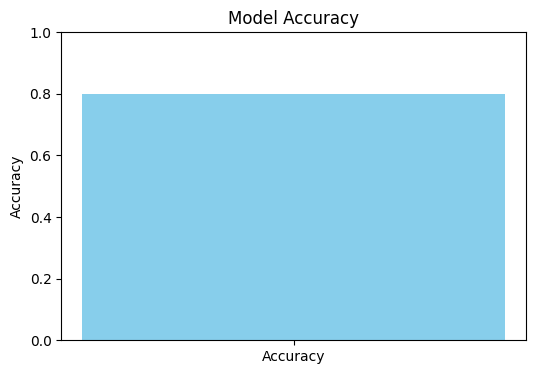

<ipython-input-10-37df4c9938b0>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


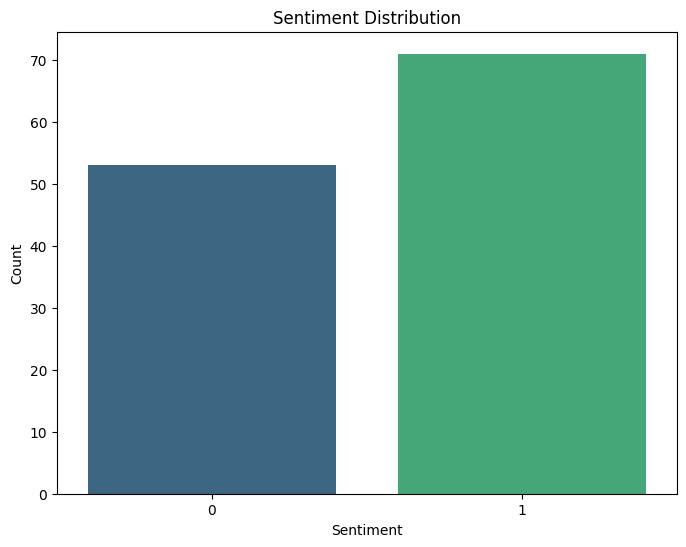

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the CSV file name
file_name = 'nlp_tamil_new_dataset.csv'

# Read the CSV file
try:
    df = pd.read_csv(file_name, header=None)
    df.columns = ['Review', 'Sentiment']  # Set appropriate column names
except FileNotFoundError:
    print(f"File not found: {file_name}")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Prepare data
X = df['Review']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data to a bag-of-words (BoW) representation
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_bow, y_train)

# Predict on the test data
y_pred = model.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Additional Plots
# 1. Accuracy bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# 2. Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
